# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [13]:
%matplotlib notebook
%matplotlib inline

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [15]:
# Checking the number of mice.
mice = len(combined_df["Mouse ID"].unique())
mice

249

In [16]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
duplicate

array(['g989'], dtype=object)

In [17]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.000000,0
589,g989,Propriva,Female,21,26,5,47.570392,0
591,g989,Propriva,Female,21,26,10,49.880528,0
593,g989,Propriva,Female,21,26,15,53.442020,0
595,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(clean_df["Mouse ID"].unique())
new_mice_count

249

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance,
                        "Tumor Volume St. Dev.": std, "Tumor Volume Std. Err.": sem })
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


summary_1 = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean', median='median', variance='var', std_dev = 'std', SEM = 'sem')

# Using the aggregation method, produce the same summary statistics in a single line

summary_1.columns = ['Mean', 'Meidan', 'Variance', 'Std Dev', 'SEM' ]

summary_1


,Mean,Meidan,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [22]:
counts = clean_df['Drug Regimen'].value_counts()
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: count, dtype: int64

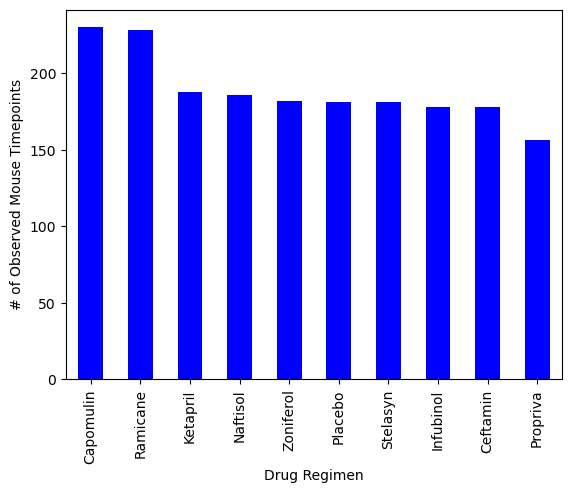

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = clean_df['Drug Regimen'].value_counts()
counts.plot(kind='bar', color = "blue")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

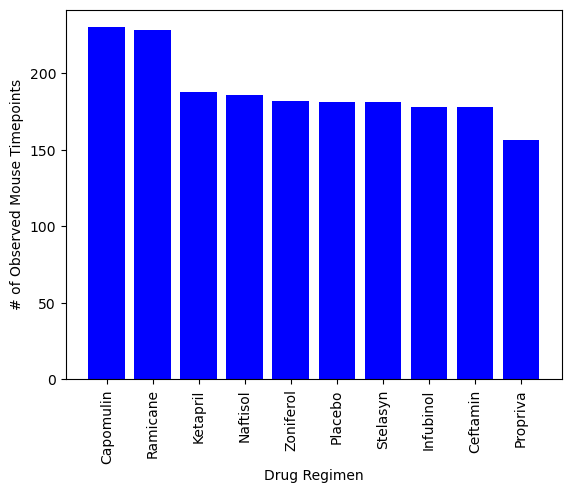

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

counts = clean_df['Drug Regimen'].value_counts()
plt.bar(counts.index, counts.values, color = 'blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

plt.show()

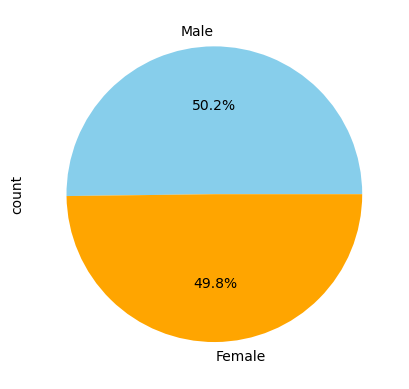

In [25]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

unique_mice = combined_df[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart

gender_counts.plot(kind='pie', autopct="%1.1f%%", startangle=0, colors=['skyblue','orange'])
plt.show()


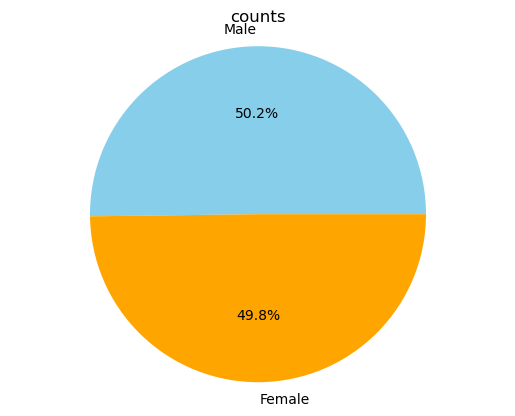

In [26]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = combined_df[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart

plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=0, colors=['skyblue', 'orange'])
plt.axis('equal')
plt.title('counts')
plt.show()


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_point = combined_df.groupby(["Mouse ID"])["Timepoint"].max()
time_point = time_point.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = time_point.merge(combined_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # add subset
    tumor_vol.append(tumor)

    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
    print(f"For {treatment}, the outliers are: {outliers}")



For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


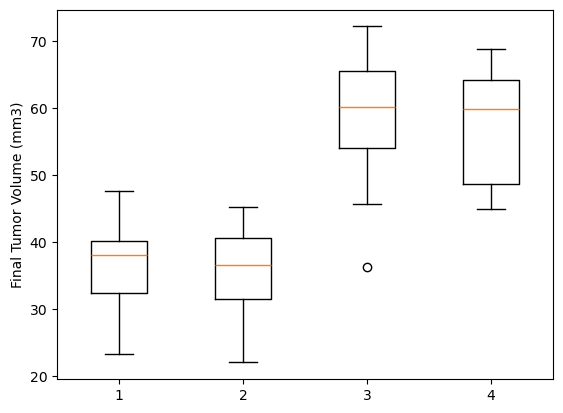

In [29]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

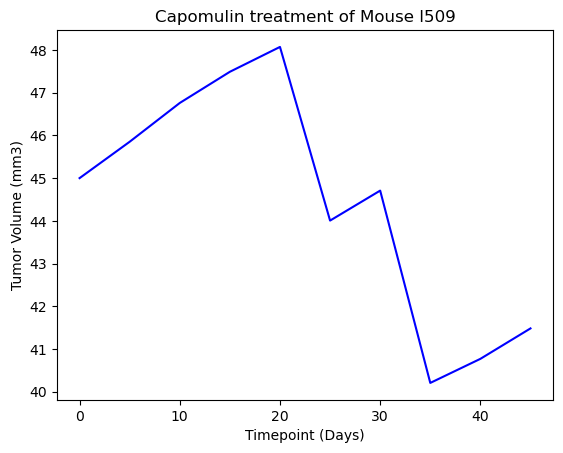

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]


mouse = capomulin.loc[capomulin["Mouse ID"] == "l509",:]

x_axis = mouse["Timepoint"]
volume = mouse["Tumor Volume (mm3)"]

chart = plt.plot(x_axis, volume, color="blue")
plt.title("Capomulin treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

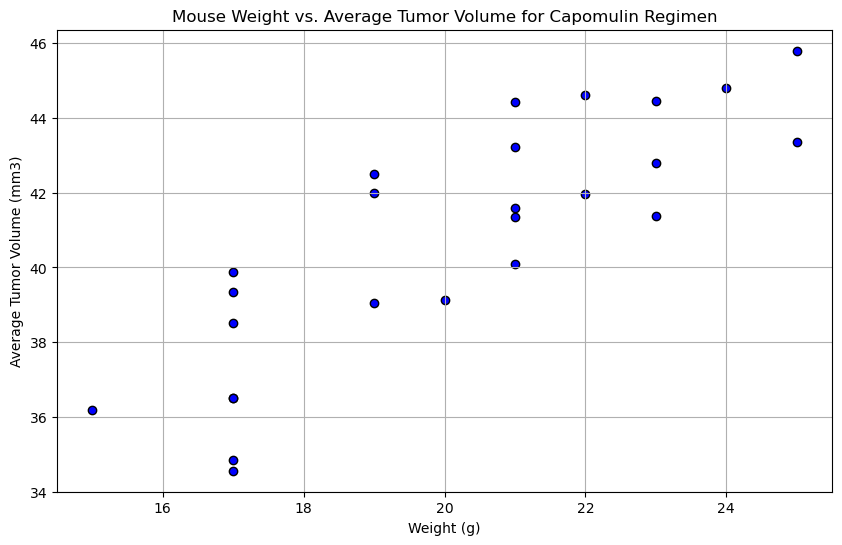

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_vol.columns = ['Mouse ID', 'Average Tumor Volume (mm3)']

# Merge with the weights
weights = capomulin[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_df = pd.merge(avg_tumor_vol, weights, on='Mouse ID')

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Weight (g)'], merged_df['Average Tumor Volume (mm3)'], color='b', edgecolor='k')

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Show plot
plt.show()


## Correlation and Regression

In [32]:
merged_df.head()

,Mouse ID,Average Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22


The correlation between mouse weight and average tumor volume is: 0.84


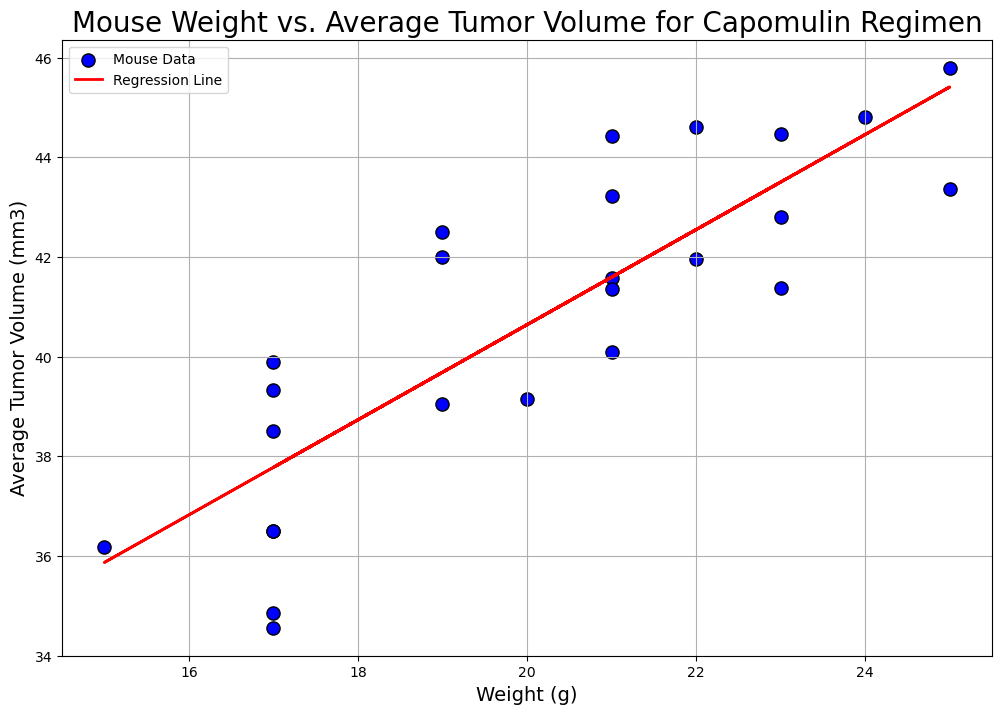

In [33]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(merged_df['Weight (g)'],merged_df['Average Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

X = merged_df['Weight (g)'].values.reshape(-1, 1)
y = merged_df['Average Tumor Volume (mm3)'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Generate the scatter plot and regression line
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(merged_df['Weight (g)'], merged_df['Average Tumor Volume (mm3)'], s=90, color="blue", edgecolor='k', label='Mouse Data')
ax.plot(merged_df['Weight (g)'], predictions, color='red', linewidth=2, label='Regression Line')

# Add titles and labels
ax.set_title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=20)
ax.set_xlabel('Weight (g)', fontsize=14)
ax.set_ylabel('Average Tumor Volume (mm3)', fontsize=14)
ax.legend()
ax.grid(True)

#plt.scatter(merged_df['Weight (g)'],merged_df['Average Tumor Volume (mm3)'],s=90, color="blue")
#plt.title("Correlation between Mouse weight & Average Tumor Volume")
#plt.xlabel("Weight (g)")
#plt.ylabel("Averag Tumor Volume (mm3)")